In [74]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
#显示中文字符
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [75]:
#查看阵列a1的属性
def check(a1):
    print(a1)  
    print("数据类型",type(a1))           #打印数组数据类型  
    print("数组元素数据类型：",a1.dtype) #打印数组元素数据类型  
    print("数组元素总数：",a1.size)      #打印数组尺寸，即数组元素总数  
    print("数组形状：",a1.shape)         #打印数组形状  
    print("数组的维度数目",a1.ndim)      #打印数组的维度数目
    print()

## 逻辑回归

In [78]:
# Logistic_Regression 逻辑回归
# 线性模型 判别模型 计算P(Y|X)
# 分类问题 （二分类）
class Logistic_Regression:
    def __init__(self,n=10):
        #param:
        # n 生成点的数量
        self.n=n
        self.dimension=2 #x的维度 (x1,x2···)
        self.theta=np.arange(0,self.dimension+1).reshape(self.dimension+1,1) #shape(3,1)
        self.x,self.X,self.y=self.generate_data(self.n,True)
        
        #check(self.x)
    def train(self):
        self.grad_ascent()
        self.plot_result()
        self.score()

    def grad_ascent(self):
        #function:
        # 梯度下降法计算参数
        __epoch__ = 10000 #回归轮数
        
        X=self.X #shape(n,3)
        y=self.y #shape(n,1)
        theta=self.theta #shape(1,3)
        
        n = X.shape[0]
        alpha = 1

        for  i in tqdm(range(__epoch__)):
            error=self.sigmoid(X@theta)-y #error h(z)-y shape(n,1)
            loss0=self.loss_function(theta,X,y)
            theta=theta-alpha*X.T@error   #theta shape(3,1) theta(i+1)=theta(i)-(alpha/n)*加和1~n(h(z)-y)*x
            loss1=self.loss_function(theta,X,y)
    
            if(loss1-loss0>0):
                alpha*=0.5
        
        self.theta=theta
        print('训练完成！参数为:')
        check(self.theta)
        

    def grad_ascent_withPenalty(self,data_matrix, label_mat):
        #该函数还未操作修改
        
        m, n = np.shape(data_matrix)
        alpha = 1
        lam=np.exp(-2)
        weights = np.ones((n, 1))
        for  p in range(max_cycles):
            error=sigmoid(data_matrix@weights)-label_mat
            loss0=loss_function(m,weights,data_matrix,label_mat)
            weights=(1-alpha*lam/m)*weights-alpha*data_matrix.T@error
            loss1=loss_function(m,weights,data_matrix,label_mat)
            if(loss1-loss0>0):
                alpha*=0.5
        return weights
    
    
    def generate_data(self,number,isNaive=True):
        #function:
        # 生成两组符合高斯分布的数据和不同标签
        #Param:
        # number:数据集中点的个数
        # naive:选择生成的数据是否满足朴素贝叶斯假设
        #Return:
        # train_x x坐标 [[-1,2],[2,0].···] 
        # x_matrix X矩阵 在train_x的基础上 在最后一列加一列1
        # train_y y标签 [1,0,1,1,1，···]

        number=int(number)
        # 类别为0的数据点数
        number0 = number//2
        means0 = [-0.6, 0.4]
        # 类别为1的数据点数
        number1 = number - number0
        means1 = [0.6, -0.4]
        # 随机变量方差与两个维度的协方差
        variance = 0.2#0.2
        cov = 0.5 #0.5
        train_x = np.zeros((number, 2))
        train_y = np.zeros((number, 1))

        # 满足朴素贝叶斯假设(两个维度的协方差矩阵除对角线外均为0)
        if isNaive:
            train_x[:number0, :] = np.random.multivariate_normal(means0, [[variance, 0], [0, variance]], number0)
            train_x[number0:, :] = np.random.multivariate_normal(means1, [[variance, 0], [0, variance]], number1)
            train_y[:number0] = 0
            train_y[number0:] = 1
        # 不满足朴素贝叶斯假设(两个维度的协方差矩阵除对角线外为cov)
        else:
            train_x[:number0, :] = np.random.multivariate_normal(means0, [[variance, cov], [cov, variance]], number0)
            train_x[number0:, :] = np.random.multivariate_normal(means1, [[variance, cov], [cov, variance]], number1)
            train_y[:number0] = 0
            train_y[number0:] = 1

        # 生成数据矩阵
        x_matrix = np.ones((number, 3))
        x_matrix[:,0:2]=train_x
        return train_x, x_matrix, train_y
    
    def sigmoid(self,x):
        return 1.0 / (1 + np.exp(-x))

    def loss_function(self,theta,X,y):
        #function:
        # 计算损失函数
        #param: 
        # theta:(w,b)参数
        # X: 数据集加一列1
        # y: 标签
        #return:
        # Loss: 损失函数 一个值
        
        #L(w)=(-1/n)*求和1~n(y*ln(h(z)+(1-y)*ln(1-h(z)))
        #z=w1x1+w2x2+···wkxk+b
        #h(z)=sigmoid(z)
        
        n=X.shape[0] #数据量
        z=X@theta #shape(n,1)
        hz=self.sigmoid(z) #shape(n,1)
        return (-1.0/n)*np.sum(np.multiply(y,np.log(hz+1e-5))+np.multiply((1-y),np.log(1-hz+1e-5)))
    
    def score(self):
        #function:
        # 在参数计算完成的情况下计算判别准确率
        X=self.X
        y=self.y
        theta=self.theta
        n=X.shape[0]
        classify_matrix=X@theta
        
        classify_matrix=np.where(classify_matrix>0,1,0)
        acc=np.mean(np.equal(classify_matrix,y))
        print("准确率acc:",acc)
    
    
    def plot_point(self):
        #function:
        # 将数据集中的两种标签的点画出来
        x=self.x
        X=self.X
        y=self.y
        theta=self.theta
        
        n=self.x.shape[0]
        
        plt.plot(x[0:n//2,0], x[0:n//2,1], color='g', linestyle='', marker='o',markersize=2, label=u"正例")
        plt.plot(x[n//2:n,0], x[n//2:n,1], color='r', linestyle='', marker='o',markersize=2, label=u"反例")
        plt.legend(loc='upper left')
        
        
    def plot_decision_surface(self):
        #function:
        # 将决策面按theta画出来 w1x1+w2x2+b=0
        x=self.x
        theta=self.theta
        
        x_slot=np.linspace(np.min(x[:,0]),np.max(x[:,0]))
        y_slot=(-theta[0,0]*x_slot-theta[2,0])/theta[1,0]
        #my_plot1 = np.polyval(-(theta/theta[2])[0:2][::-1],x_slot)
        plt.plot(x_slot, y_slot, linestyle='-', marker='', label="degree:1 " )
    
        
    def plot_result(self):
        #function:
        # 将分类结果画图显示出来
        plt.title("训练集 满足贝叶斯的分布 无正则项")
        self.plot_point()
        self.plot_decision_surface()
        fig=plt.figure()
        plt.show()
   


100%|██████████| 10000/10000 [00:00<00:00, 20708.18it/s]

训练完成！参数为:
[[ 6.20427921]
 [-5.0044729 ]
 [ 1.16392972]]
数据类型 <class 'numpy.ndarray'>
数组元素数据类型： float64
数组元素总数： 3
数组形状： (3, 1)
数组的维度数目 2



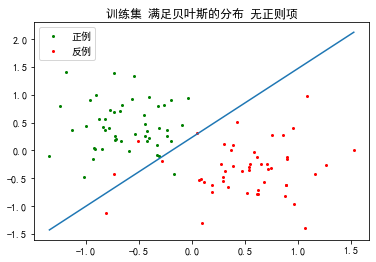

<Figure size 432x288 with 0 Axes>

准确率acc: 0.96


In [79]:
LR=Logistic_Regression(100)
LR.train()